In [2]:
from misc import load_data
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm



In [11]:
periods=100
ppp=500
itraj=1
dt = 1/ppp

In [13]:
import os
os.makedirs("nn", exist_ok=True)

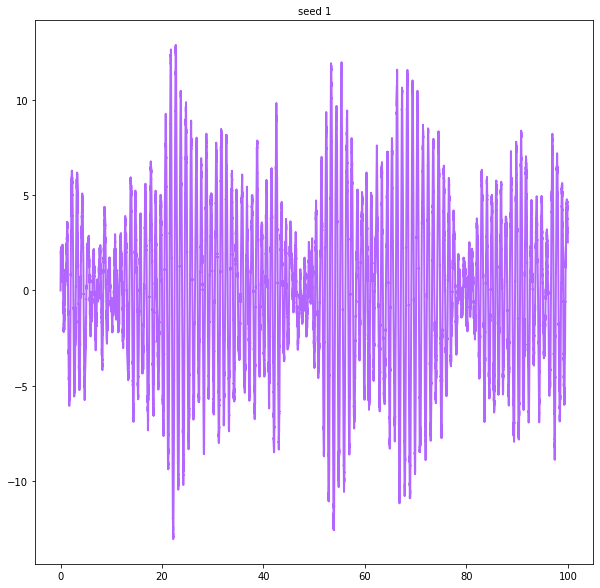

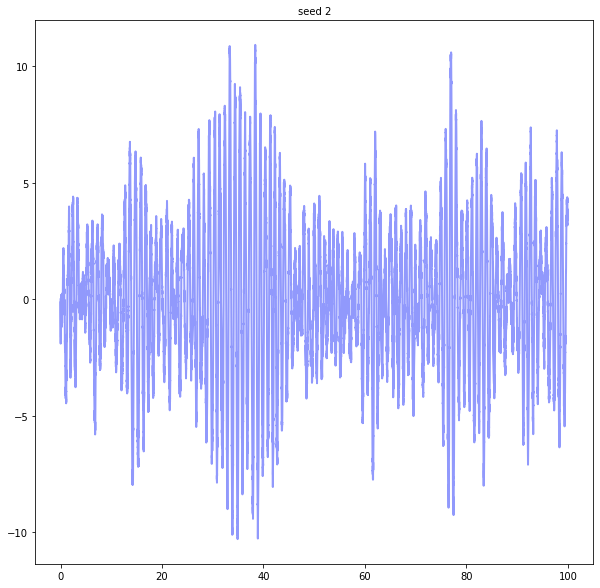

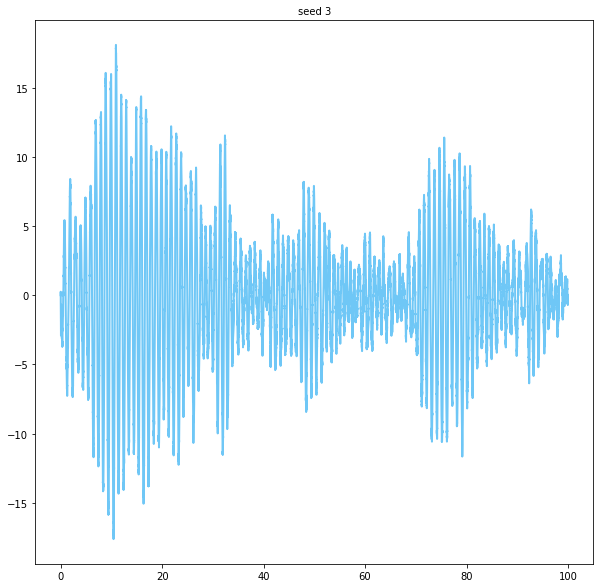

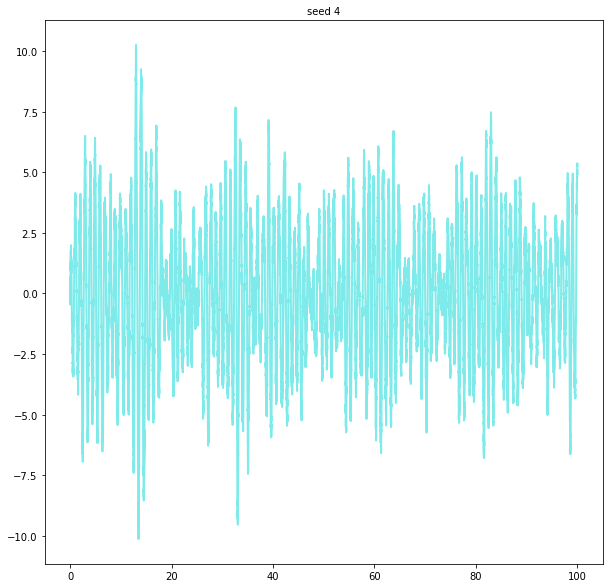

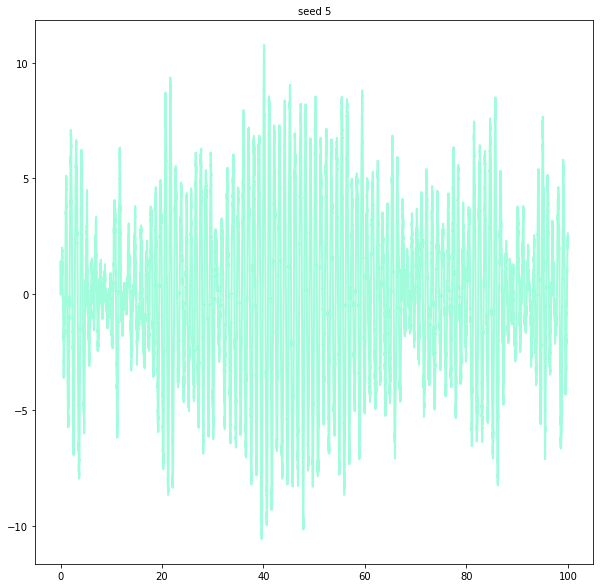

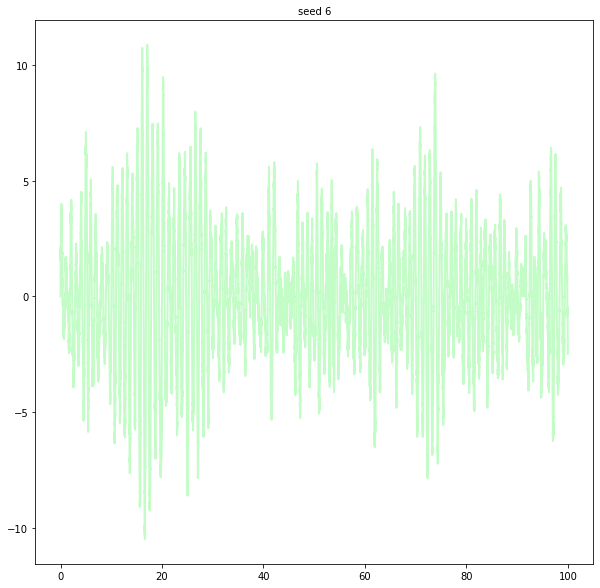

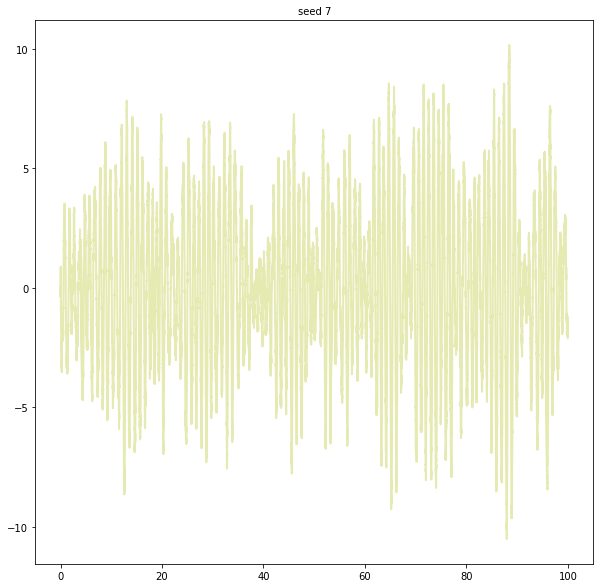

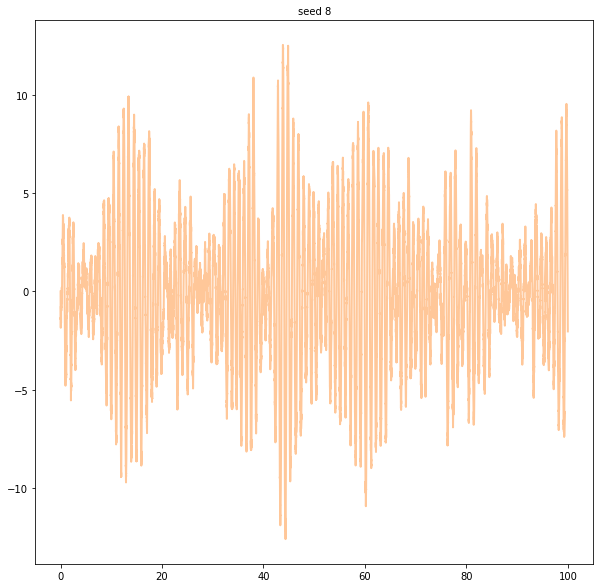

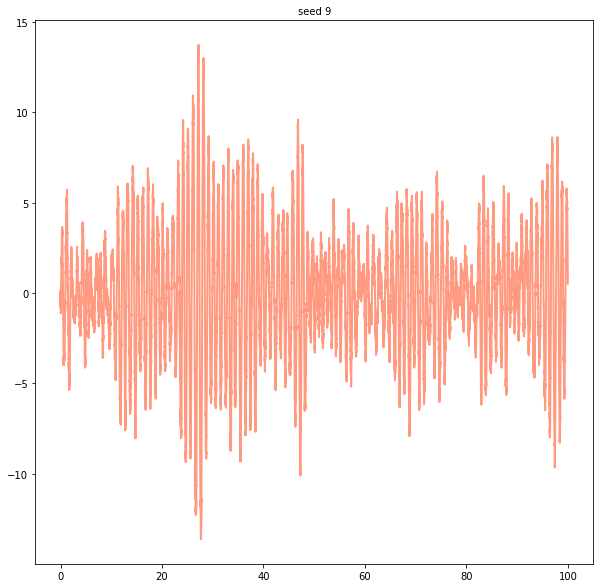

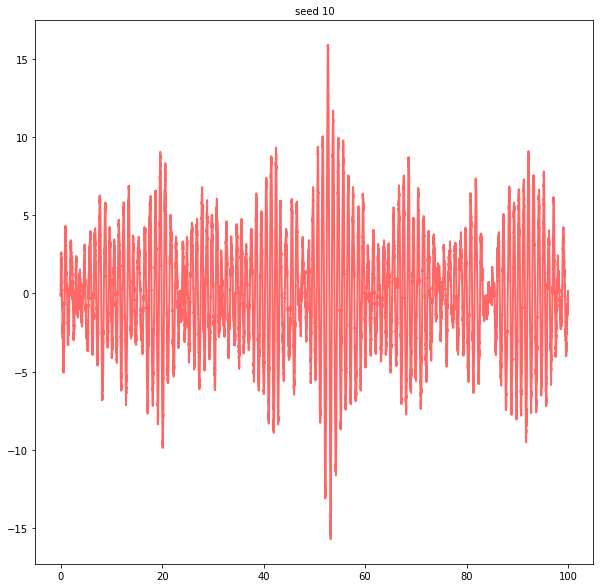

In [18]:
N=10
itraj=1
colors = plt.get_cmap("rainbow")
for ii in range(1,N+1):

    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot2grid((1,1),(0,0))
    states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
    ax.set_title("seed {}".format(itraj),size=10)
    ax.plot(np.arange(0,periods,dt), states[:,0][:-1], color=colors(np.linspace(0,1,int(N)))[itraj-1], alpha=0.6, linewidth=2)#, alpha=0.8, linewidth=2)
    itraj+=1
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.savefig("nn/states{}.png".format(itraj), dpi=100)
    
                #"ax.set_xticks([])
       # "ax.set_yticks([])
       #" ax.spines['top'].set_visible(False)
       #" ax.spines['right'].set_visible(False)
       #" ax.spines['bottom'].set_visible(False)
      # " ax.spines['left'].set_visible(False)
        #itraj +=1


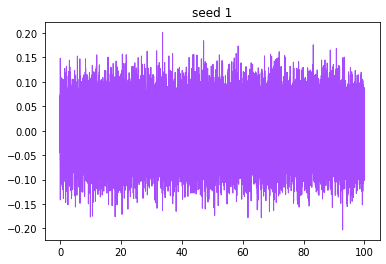

In [56]:
N=1
itraj=1
colors = plt.get_cmap("rainbow")
#fig = plt.figure(figsize=(100,100))
for ind1 in range(N):
    for ind2 in range(N):
        ax = plt.subplot2grid((N,N),(ind1,ind2))
        states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
        ax.set_title("seed {}".format(itraj))
        ax.plot(np.arange(0,periods +dt,dt)[:-1], signals[:,0], linewidth=1, color=colors(np.linspace(0,1,100))[itraj-1], alpha=0.7)
        itraj +=1
#plt.savefig("landscapes/RK4_landscapes_{}.pdf".format(params))

In [18]:
from misc import *

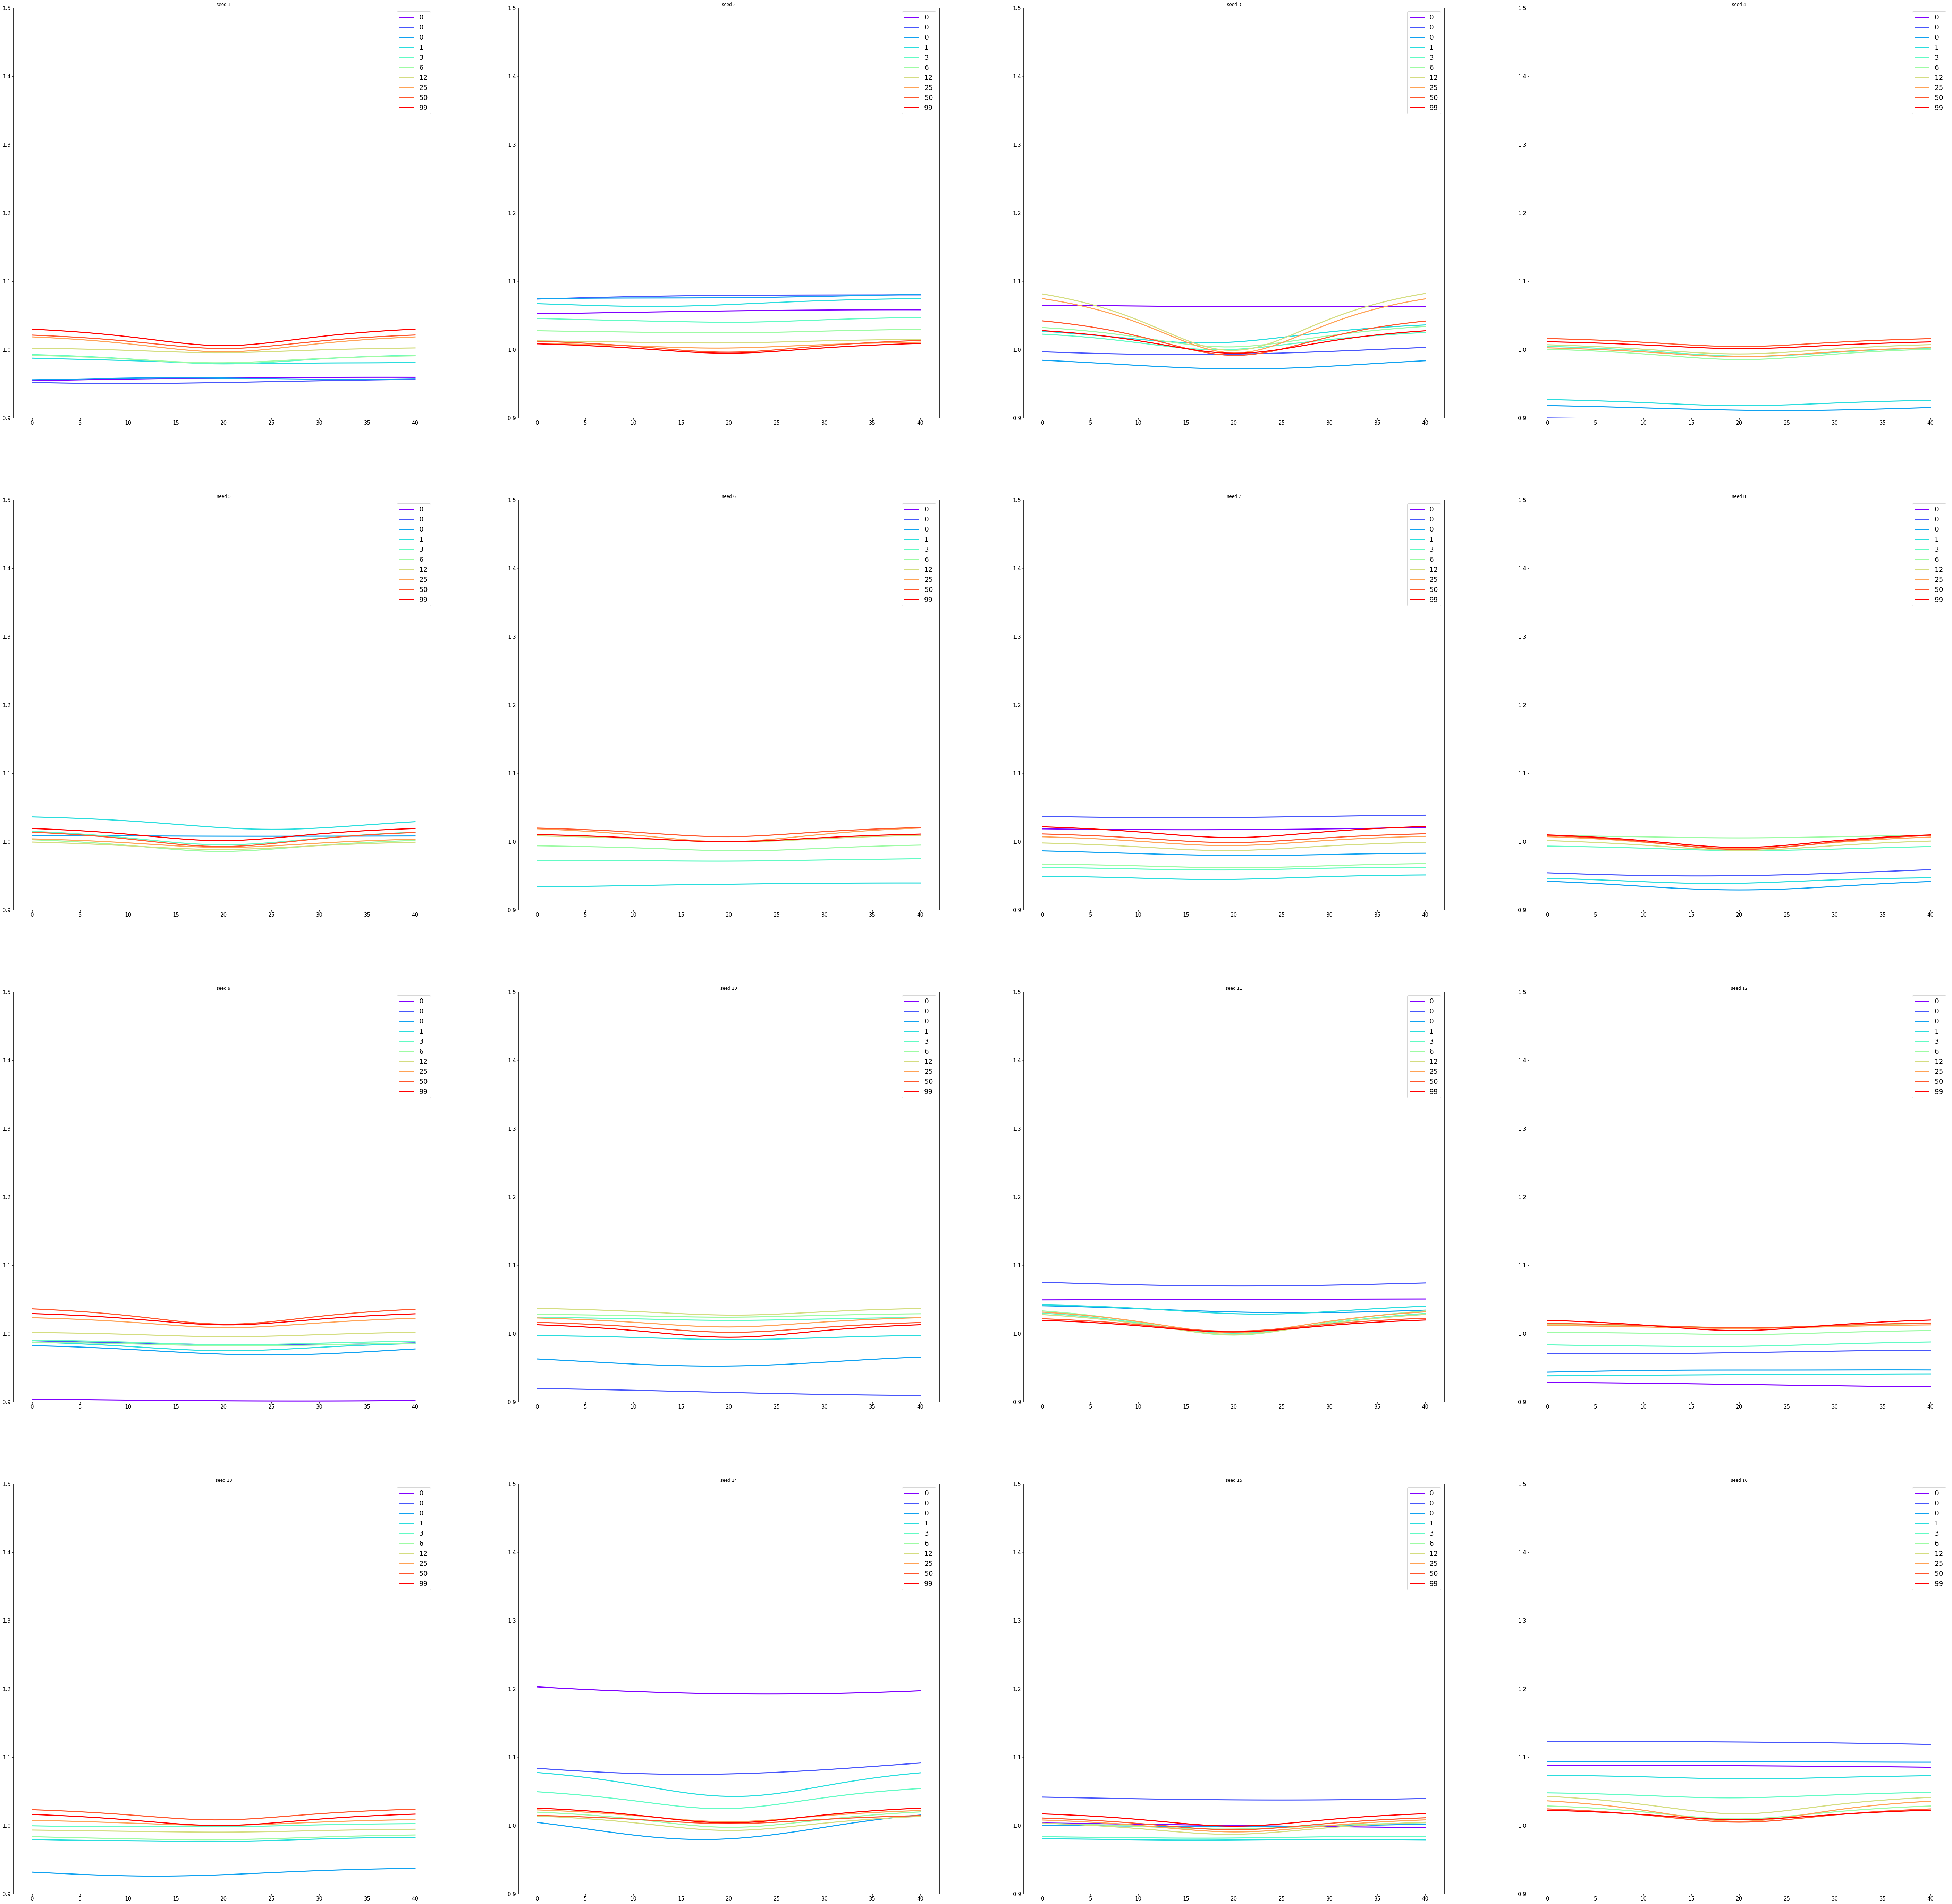

In [31]:
dt = 1/ppp
times = np.arange(0,periods+dt,dt)
cut_series = [int(k) for k in np.logspace(2,np.log10(ppp*periods),10)]
N=4
itraj=1

fig = plt.figure(figsize=(100,100))
for ind1 in range(N):
    for ind2 in range(N):
        ax = plt.subplot2grid((N,N),(ind1,ind2))
        path_landscape=get_def_path()+"{}periods/{}ppp/{}/cost_landscape/".format(periods,ppp,itraj)        
        loss = np.load(path_landscape+"RK4.npy")
        ax.set_title("seed {}".format(itraj))
        #aa = plt.imread(path_landscape+"RK4.png")
        for ind,i in enumerate(loss):
            ax.plot(i, color=colors(np.linspace(0,1,len(loss)))[ind], linewidth=3, label=str(int(times[cut_series[ind]])))
        itraj +=1
        ax.legend(prop={"size":20})
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_ylim([0.9,1.5])
plt.savefig("landscapes/RK4_costs_{}.pdf".format(params))

FileNotFoundError: [Errno 2] No such file or directory: '/data/uab-giq/scratch/matias/quantera/trajectories/1000periods/500ppp/1/cost_landscape/gamma1_RK4.npy'

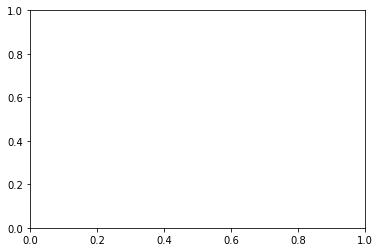

In [49]:
N, ind1, ind2 = 1,0,0
ax = plt.subplot2grid((N,N),(ind1,ind2))
itraj=1
periods = 1000
path_landscape=get_def_path()+"{}periods/{}ppp/{}/cost_landscape/gamma1_".format(periods,ppp,itraj)        
loss = np.load(path_landscape+"RK4.npy")
ax.set_title("seed {}".format(itraj))
#aa = plt.imread(path_landscape+"RK4.png")
for ind,i in enumerate(loss):
    ax.plot(i, color=colors(np.linspace(0,1,len(loss)))[ind], linewidth=3, label=str(int(times[cut_series[ind]])))


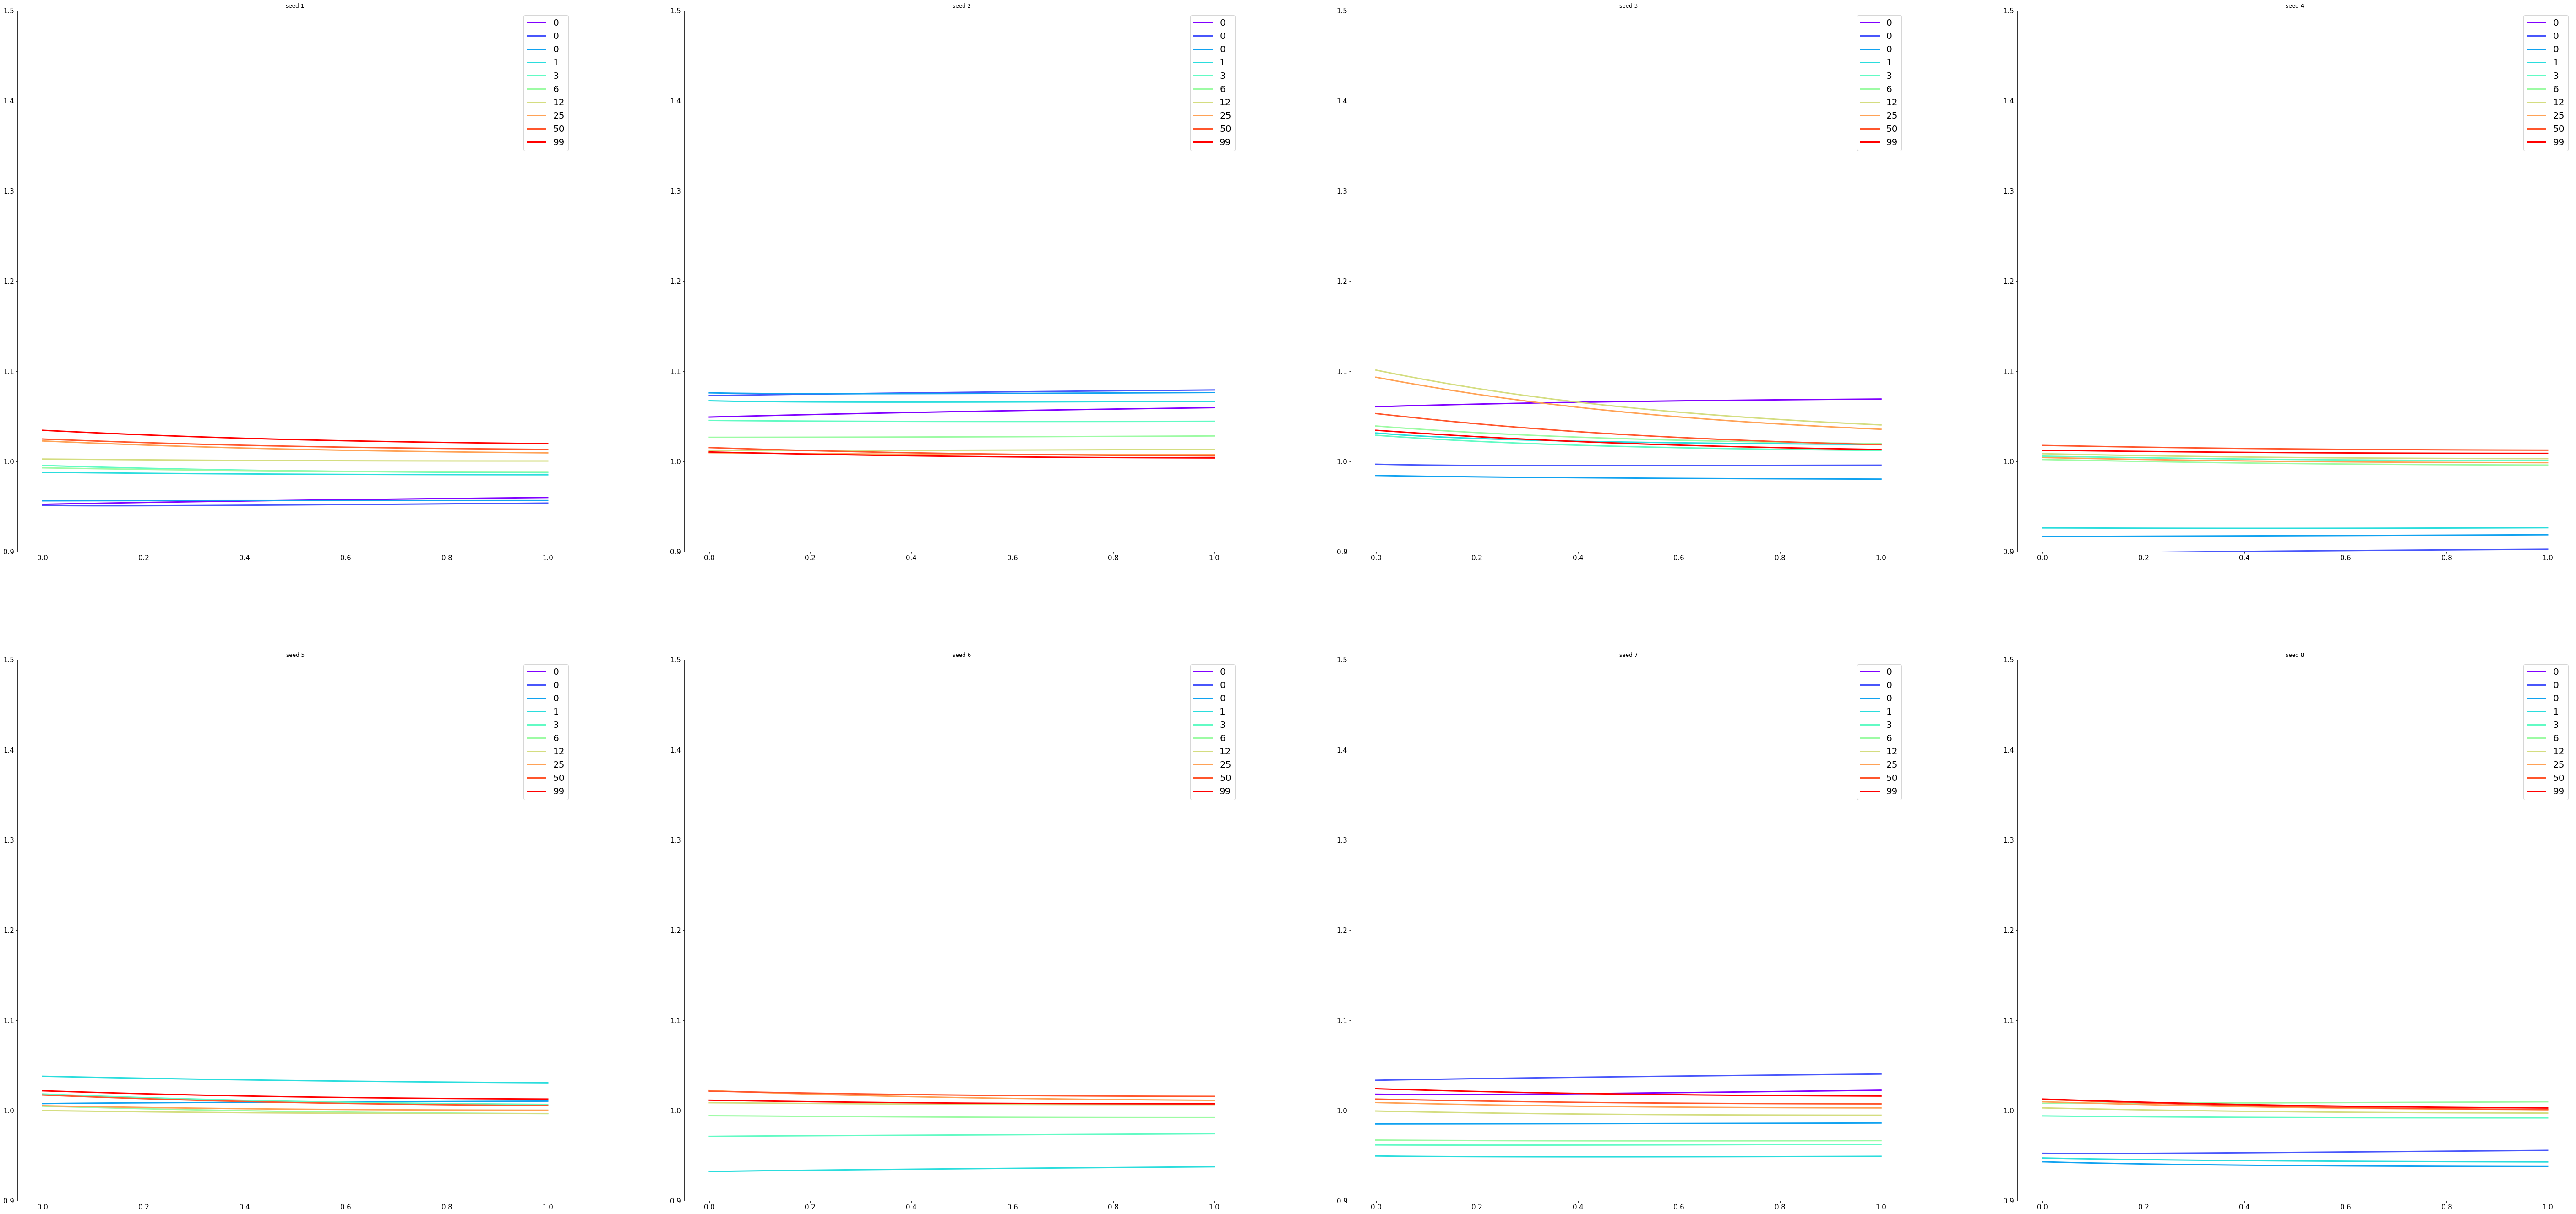

In [43]:
dt = 1/ppp
times = np.arange(0,periods+dt,dt)
cut_series = [int(k) for k in np.logspace(2,np.log10(ppp*periods),10)]
N=4
itraj=1
colors = plt.get_cmap("rainbow")
fig = plt.figure(figsize=(100,100))
for ind1 in range(N):
    for ind2 in range(N):
        if itraj < 9:
            ax = plt.subplot2grid((N,N),(ind1,ind2))
            path_landscape=get_def_path()+"{}periods/{}ppp/{}/cost_landscape/gamma1_".format(periods,ppp,itraj)        
            loss = np.load(path_landscape+"RK4.npy")
            ax.set_title("seed {}".format(itraj))
            #aa = plt.imread(path_landscape+"RK4.png")
            for ind,i in enumerate(loss):
                ax.plot(np.arange(0,1.05,.05),i, color=colors(np.linspace(0,1,len(loss)))[ind], linewidth=3, label=str(int(times[cut_series[ind]])))
            itraj +=1
            ax.legend(prop={"size":20})
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.set_ylim([0.9,1.5])
        else:
            break
plt.savefig("landscapes/RK4_costs_gamma_{}.pdf".format(params))